## 12.4 聚类性能度量

### 12.4.1 拐点法

拐点法（Elbow method）是一种基于可视化方法的聚类性能评价指标，用于帮助确定聚类算法中的最佳聚类数目。该方法的基本思想是在聚类数量增加时，聚类的效果会逐渐变好，但随着聚类数量的增加，聚类的效果会达到一个拐点，拐点之后增加聚类数量不会显著改善聚类的效果，而是导致聚类结果更加碎片化。在拐点法中，我们需要计算每个聚类数目下的聚类模型的评价指标，并将其绘制成图表。一般来说，我们会计算每个聚类数目下的SSE（Sum of Squared Errors，误差平方和）或者SSB（Sum of Squared Between，类间平方和）等指标，并将其绘制成折线图。然后，我们需要找到折线图上的拐点，即SSE或SSB的变化率开始逐渐降低的点。该点对应的聚类数目即为最佳聚类数目。

以下是拐点法的基本步骤：

（1）使用聚类算法对数据进行聚类，并计算不同聚类数目下的聚类模型评价指标。

（2）将聚类数目和对应的评价指标绘制成图表。

（3）观察图表，找到评价指标曲线开始变化率逐渐降低的拐点。

（4）拐点对应的聚类数目即为最佳聚类数目。

需要注意的是，拐点法只是一种常用的聚类性能评价方法之一，不一定适用于所有情况，特别是当聚类数量较多时，可能不容易找到明显的拐点。因此，拐点法一般用于初步估计最佳聚类数目，还需要结合其他评价指标进行综合评价。

### 12.4.2 外部度量

外部指标 (external index)：将聚类结果与某个“参考模型”(reference 
model)进行比较。令$C=\{ C_1,C_2,\cdots,C_k \}$对数据集$D=\{ x_1,x_2,\cdots,x_m \}$,假定通过聚类得到的簇划分为$C=\{ C_1,C_2,\cdots,C_k \}$，参考模型给出的簇划分为$C=\{ C^{*}_1,C^{*}_2,\cdots,C^{*}_S \}$,，令$\lambda$与$\lambda_∗$分别表示与$C$和$C^*$对应的簇标记向量。我们将样本两两配对考虑，定义

$$a=|SS|,SS=\{(x_i,x_j)|\lambda_i=\lambda_j,\lambda_i^*=\lambda_j^*,i<j\}$$
$$b=|SD|,SD=\{(x_i,x_j)|\lambda_i=\lambda_j,\lambda_i^*\neq\lambda_j^*,i<j\}$$
$$c=|DS|,DS=\{(x_i,x_j)|\lambda_i\neq\lambda_j,\lambda_i^*\neq\lambda_j^*,i<j\}$$
$$a=|DD|,DD=\{(x_i,x_j)|\lambda_i\neq\lambda_j,\lambda_i^*\neq\lambda_j^*,i<j\}$$

每个样本只能出现在一个集合中。下面给出几种常见的外部指标度量方式。

（1）Jaccard系数（Jaccard Coefficient, JC）


$$ JC=\frac{a}{a+b+c} $$

（2）FM指数（Fowlkes and Mallows Index, FMI）

$$ FMI=\sqrt{\frac{a}{a+b}\cdot\frac{a}{a+c}} $$

（3）Rand指数（Rand Index, RI）

$$ RI=\frac{2(a+d)}{m(m-1)} $$

[0,1]区间内,这三个指标越大越好。a为在“聚类结果”中隶属于相同“类簇”，且“基准数据”中也“隶属”相同“类簇”的样本对的个数。d为在“聚类结果”中并不隶属于相同“类簇”，且“基准数据”中也并不“隶属”相同“类簇”的样本对的个数，m为训练集的大小。


### 12.4.3 内部度量

内部指标 (internal index)：直接考察聚类结果而不用任何参考模型。考虑聚类结果的划分$C=\{ C_1,C_2,\cdots,C_k \}$，定义簇C内样本的平均距离

$$ avg(C)=\frac{2}{|C|(|C|-1)}\sum_{1\leq i<j\leq|C|}dist(x_i,x_j) $$

簇C内样本间最远距离

$$ diam(C)=max_{1\leq i<j\leq|C|}dist(x_i,x_j) $$

簇 $C_i$与簇 $C_j$最近样本间的距离

$$ d_{min}(C_i,C_j)=min_{x_i\in C_i,x_j\in C_j}dist(x_i,x_j) $$

簇$C_i$与簇$C_j$中心点间的距离

$$ d_{cen}(C_i,C_j)=dist(\mu_i,\mu_j) $$

定义以下内部指标：

DB指数（Davies-Bouldin Index, DBI）
$$DBI=\frac{1}{k} \sum_{i=1}^{n}max_{j\neq i}(\frac{avg(C_i)+avg(C_j)}{d_{cen}(C_i,C_j)})$$

Dunn指数（Dunn Index, DI）
$$DI=min_{1\leq i \leq k}\{min_{j\neq i}(\frac{d_{min}(C_i,C_j)}{max_{1\leq l\leq k}diam{C_l}})\}$$

轮廓系数
$$S(i)=\frac{a(i)-b(i)}{max(a(i),b(i))}$$
其中a(i)代表“簇内不相似度”，即向量i到所属簇中其他数据点的平均距离，b(i)代表“簇间不相似度”，向量i到簇所有点的平均距离。DBI越小，Duu指数越大，模型效果越好。除了这几个指标之外，Calinski-Harabaz 指数和SSE也是常见的内部评价指标。

## 12.5 关联规则挖掘

### 12.5.1 挖掘任务

 关联规则挖掘（Association Rule Mining）是数据挖掘中研究较早而且至今仍活跃的研究方
法之一，是数据挖掘的其他研究分支的基础。最早是由Agrawal等人提出的（1993），提出的动机是针对购物篮分析问题提出的，其目
的是为了发现交易数据库中不同商品之间的联系规则。关联”指形如X → Y 的蕴含式，可以理解为 if x, then y。因此关联规则分析也称为购物篮分析。例如，一个超市的经理想要用于发现隐藏在大型数据集中的令人感兴趣的联系，所发现的模式通常用关联规则或频繁项集的形式表示。关联规则反映了一个事物与其他事物之间的相互依存性和关联性。如果两个或多个事物之间存在一定的关联关系，那么，其中一个事物发生就能够预测与之相关联的其他事情的发生。<p>关联规则挖掘用于知识发现，而非预测，所以是属于无监督的机器学习算法。下面通过餐饮企业中的一个实际情景引出关联规则的概念。客户在餐厅点餐时，面对菜单中大量的菜品信息，往往无法迅速找到满意的菜品，既增加了点菜的时间，又队了客户的就餐体验。实际上，菜品的合理搭配是有规律可循的:顾客的饮食习惯、品的荤素和口味，有些菜品之间是相互关联的，而有些菜品之间是对立或竞争关系，这些规律都隐藏在大量的历史菜单数据中，如果能够通过数据挖掘发现客户点餐的规律，就可以快速识别客户的口味偏好，当顾客下了某个菜品的订单时推荐而相关联的菜品，引导顾客消费，提高顾客的就餐体验和餐饮企业的业绩水平。还有一个典型的例子是，一个超市的经理想要更多地了解顾客的购物习惯，比如“哪组商品可能会在一次购物中同时购买?”或者“某顾客购买了个人电脑，那该顾客3个月后购买数码相机的概率有多大?”他可能会发现，购买了面包的顾客同时很有可能会购买牛奶，这就导出了一条关联规则“面包 → 牛奶”，其中面包称为规则的前项(先导)，而牛奶称为后项（后继）。通过对面包降低售价进行促销，而适当提高牛奶的售价，关联销售出的牛奶就有可能增加超市整体的利润。<p>
    
   **案例**  
   
   *“啤酒与尿布”的故事可以说是营销界的经典段子，在打开Google搜索一下，你会发现很多人都在津津乐道于“啤酒与尿布”，可以说100个人就有100个版本的“啤酒与尿布”的故事。故事的时间跨度从上个世纪80年代到本世纪初，甚至连故事的主角和地点都会发生变化--从美国跨越到欧洲。认直地查了一下资料，我们发现沃尔玛的“啤洒与尿布”案例是正式刊登在1998年的《哈佛商业评
论》上面的，这应该算是目前发现的最权威报道。“啤酒与尿布”的故事产生于20世纪90年代的美国沃尔玛超市中，沃尔玛的超市管理人员分析销
售数据时发现了一个令人难干理解的现象:在某些特定的情况下，“啤酒”与“尿布”两件看上去毫无
关系的商品会经常出现在同一个购物篮中，这种独特的销售现象引起了管理人员的注意，经过后续
调查发现，这种现象出现在年轻的父亲身上。
在美国有婴儿的家庭中，一般是母亲在家中照看婴儿，年轻的父亲前去超市购买尿布。父亲在
购买尿布的同时，往往会顺便为自己购买啤酒，这样就会出现啤酒与尿布这两件看上去不相干的商
品经常会出现在同一个购物篮的现象。如果这个年轻的父亲在卖场只能买到两件商品之一，则他很有可能会放弃购物而到另一家商店，直到可以一次同时买到啤酒与尿布为止。沃尔玛发现了这一独
特的现象，开始在卖场尝试将啤酒与尿布摆放在相同的区域，让年轻的父亲可以同时找到这两件商
品，并很快地完成购物;而沃尔玛超市也可以让这些客户一次购买两件商品、而不是一件，从而获得了很好的商品销售收入，这就是“啤酒与尿布”故事的由来。*
    
   设 $I = { I_1 , I_2 , . . . , I_m }$ 是一个项集（Item Set）， m为项的个数，其中 $I_i$ 表示第 i 个项，对应于一个个商品。事务（Transaction）$t_i$ 表示 I的一个子集，对应于一个个订单。事务组成的集合记做 $ D=\{t_1,t_2,...,t_n\}$ ，通常也称作事务数据库。通常描述中，每一个事务都有唯一的编号，记做TID，每个事务中都包含若干个项Items。<p>前文说到，关联规则是形如 X → Y 的蕴涵式，其中， X和Y分别称为关联规则的先导(antecedent或left-hand-side, LHS)和后继(consequent或right-hand-side, RHS) 。其中，关联规则XY，存在支持度和置信度，定义如下：<p>（1）支持度（ X → Y ） = $\frac{同时包含X和Y的事务数量}{所有事务数量}$,理解为某一个项出现的概率。通常设置一个阈值minsupport，当支持度不小于该值时认为是频繁项；<p>
    （2）置信度（ X → Y 
    ） = $\frac{同时包含X和Y的事务数量}{包含X的事物数量}$，理解为在X事务的基础上，X和Y均出现的条件概率 <p>因此关联规则实际上包含两个子任务：<p>（1）频繁模式发现：也称频繁模式挖掘、频繁项挖掘等，是指从一系列候选的项中选择频繁的部分，通常衡量频繁的程度可以是对每一项出现的频率，当超过某一阈值是则任务这个项是频繁的。<p>
    （2）生成关联规则：在已经发现的最大频繁项目集中，寻找置信度不小于用户给定的minconfidence的关联规则。


### 12.5.2 Apriori

Apriori 算法是一种最有影响力的挖掘布尔关联规则的频繁项集的算法，它是由 Agrawal 和Skrikant 提出的。它使用一种称作逐层搜索的迭代方法，演示了如何在现实的时间尺度内生成关联规则，至少对于较小数据库而言是可行的。该方法依赖于以下的重要结论。

 **定理1**  *如果项目集X 是频繁项目集，那么它的所
有非空子集都是频繁项目集。* 
 
 **证明**  *从项目集中删除一个或多个项目不会减少匹配的事务数量，通常还会增加匹配数量。因此，对项目集的子集的支持至少与对原始项集的支持一样。因此，支持项目的任何非空子集也必须被支持。*

此结论有时称为项目集的“向下闭包属性”(downward closure property)。如果将包含所有支持项目集(基数为k)的集合写为$L_k$,那么可从上面得到第二个重要结论(字母L表示“大型项目集”)。 

**定理2**  *如果 $L_k=\Phi$(空集)，则 $L_{k+1}、L_{k+2}$等也必须为空*。

**证明**  *如果存在任何基数为k+1或更大的支持项目集，也就存在基数为k的子集，并且通过定理1可得出所有子集也必须被支持。但是我们知道，由于$L_k$为空，因此不支持基数为k的项目集。也就是说，不支持基数为k+1或更大的子集，因此$L_{k+1} 、L_{k+z}$ 等必须都是空的*。

利用上述结论，可按基数的升序生成支持项目集，即首先是包含一个元素的项目，然后是包含两个元素的项目，再后是包含三个元素的项目等。在每个阶段，基数为k的支持项目$L_k$是从前一个项目集$L_{k-1}$生成的。这种方法的好处是，如果在任何阶段$L_k$为$\Phi$(空集)，则可以知道$L_{k+1}$、$L_{k+2}$等也必须是空的。此时，不需要生成基数为k+1或更大的项目集，然后针对数据库中的事务进行测试，因为它们肯定不会得到支持。

我们需要一种从项目集$L_{k-1}$到下一个项目集$L_k$的方法。可分两个阶段完成。首先，使用$L_k$生成包含基数为k的项目集的候选集$C_k$。$C_k$的构造方式必须确保包含所有支持的基数为k的项目集，但也可能包含其他一些不受支持的项目集。接下来，需要生成$L_k$作为$C_k$的子集。通常可通过检查$L_{k-1}$的成员来丢弃一些可能成为$L_k$成员的$C_k$成员。然后需要根据数据库中的事务检查剩余成员并计算出它们的支持度值。只有支持度值大于或等于 minsup 的项目集才从 $C_k$复制到$L_k$给出 Apriori 算法，该算法用于生成基数至少为2的所有支持项目集。




**算法** 

*（1）设置最小支持度阈值$min_sup$和最小置信度阈值$min_conf$；*

*（2）扫描数据集，统计每个项集的支持度，得到频繁1项集；*

*（3）根据频繁1项集，使用Apriori性质产生候选2项集；*

*（4）扫描数据集，统计候选2项集的支持度，筛选出频繁2项集；*

*（5）根据频繁2项集，使用Apriori性质产生候选3项集；*

*（6）扫描数据集，统计候选3项集的支持度，筛选出频繁3项集；*

*（7）重复上述步骤，直到无法产生更多频繁项集为止；*

*（8）根据频繁项集，计算其置信度，并筛选出满足最小置信度阈值的关联规则。可以按照下面的步骤生成关联规则：①对于每一个频繁项目集l，生成其所有的非空子集；②对于l 的每一个非空子集x，计算Conference（x），如果Confidence（x）≥minconfidence，那么“x→（l-x）”成立*

| TID | Items |
| --- :| :---: |
| T1 | {milk,tea} |
| T2 | {milk,sugar} |
| T3 | {milk,tea,sugar} |
| T4 | {milk,tea,sugar} |
| T5 |{milk,tea} |
|T6 | {tea,sugar} |
| T7 |{tea,sugar} |
|T8 | {milk,tea,sugar}|

我们可以使用Apriori算法来挖掘频繁项集和关联规则，其中设置最小支持度阈值$min_{sup}$为2，最小置信度阈值$min_{conf}$为0.5。

扫描数据集，统计每个项集的支持度，得到频繁1项集：
$$\lbrace milk \rbrace:4$$
$$\lbrace tea \rbrace:5$$
$$\lbrace sugar \rbrace:4$$

根据频繁1项集，使用Apriori性质产生候选2项集
$$\lbrace milk,tea \rbrace$$
$$\lbrace milk,sugar \rbrace$$
$$\lbrace tea,sugar \rbrace$$


扫描数据集，统计候选2项集的支持度，筛选出频繁2项集：
$$\lbrace milk,tea \rbrace:3$$
$$\lbrace milk,sugar \rbrace:2$$
$$\lbrace tea,sugar \rbrace:3$$

根据频繁2项集，使用Apriori性质产生候选3项集：
$$\lbrace milk,tea,sugar \rbrace$$

扫描数据集，循环迭代，直到找出所有频繁项集

Apriori作为经典的频繁项目集生成算法，在数据挖掘中具有里程碑的作用。 Apriori算法有两个致命的性能瓶颈:

（1）多次扫描事务数据库，需要很大的I/O负载

（2）假如有一个频繁大项目集包含10个项的话，那么就至少需要扫描事务数据库
10遍。

（3）可能产生庞大的侯选集

（4）k-侯选集是指数增长的，例如104个1-频繁项目集就有可能产生接近107个元素
的2-侯选集。如此大的侯选集对时间和主存空间都是一种挑战。

在此示例代码中，我们使用了mlxtend库中的apriori函数来生成频繁项集。该函数需要输入一个DataFrame格式的数据集和一个最小支持度的阈值（这里是0.5），并返回一个包含频繁项集的DataFrame。在示例代码中，我们使用TransactionEncoder将数据集转换为二元组格式，然后将其转换为DataFrame格式，并使用Apriori算法找到支持度大于0.5的所有频繁项集。

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# 创建示例数据集
dataset = [['牛奶', '面包', '啤酒'],
           ['牛奶', '面包', '尿布'],
           ['牛奶', '尿布', '洋葱'],
           ['面包', '尿布', '啤酒'],
           ['面包', '尿布', '洋葱'],
           ['啤酒', '洋葱']]

# 转换数据集格式为二元组
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# 使用Apriori算法生成频繁项集
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

# 打印结果
print(frequent_itemsets)


    support  itemsets
0  0.500000      (啤酒)
1  0.666667      (尿布)
2  0.500000      (洋葱)
3  0.500000      (牛奶)
4  0.666667      (面包)
5  0.500000  (尿布, 面包)


### 12.5.3 FP-tree

随着数据库容量的增大，重复访问数据库将导致性能低下。因此，探索新的
理论和算法来减少数据库的扫描次数和侯选集空间占用，已经成为近年来关
联规则挖掘研究的热点之一， FP-tree算法即为一个典型方法。建立频繁模式树 与 Apriori 相似，FP-growth 算法首先统计数据集中单个项(也就是属性-值对)出现的次数。第一遍扫描数据集后，树结构在第二遍扫描的过程中建立。开始时，树是空的，然后逐渐向树中添加数据集中的实例。要得到能够快速查找大项集的压缩的树结构，关键在于把项插人树结构之前，将每个实例中的项按它们在数据集中出现的频率降序排列，而这些频率在第一遍扫描数据集的时候已经记录下来了。每个实例中不满足最小支持度阈值的单个项不会被插入树中，这就有效地将 
它们从数据集中去除了。这样做的目的的是希望多个实例将会共享最频繁出现的项，最终在树的根部取得高度的压缩效果。

FP-tree基本原理：
（1）进行2次数据库扫描：一次对所有1-项目的频度排序；一次将数据库信息
转变成紧缩内存结构。（2）不使用侯选集，直接压缩数据库成一个频繁模式树，通过频繁模式树可
以直接得到频集。

下面给出一个例子，两次扫描数据库，生成频繁模式树FP-Tree：
（1） 扫描数据库一次，得到所有1-项目的频度排序表T；
（2）依照T，再扫描数据库，得到FP-Tree。
使用FP-Tree，生成频集：
（1） 为FP-tree中的每个节点生成条件模式库；
（2） 用条件模式库构造对应的条件FP-tree；
（3）递归挖掘条件FP-trees同时增长其包含的频繁集：
（4）如果条件FP-tree只包含一个路径，则直接生成所
包含的频繁集

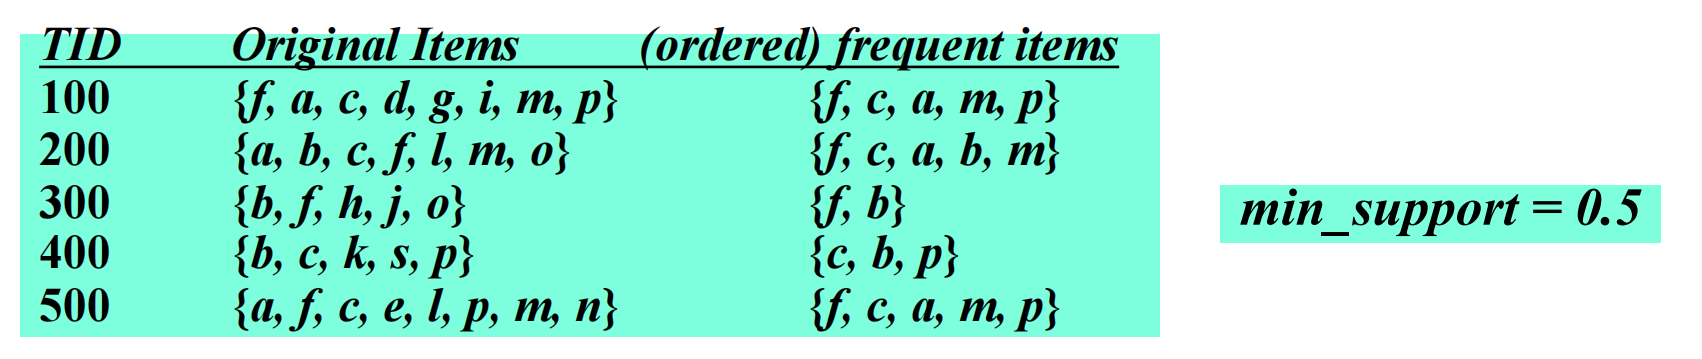

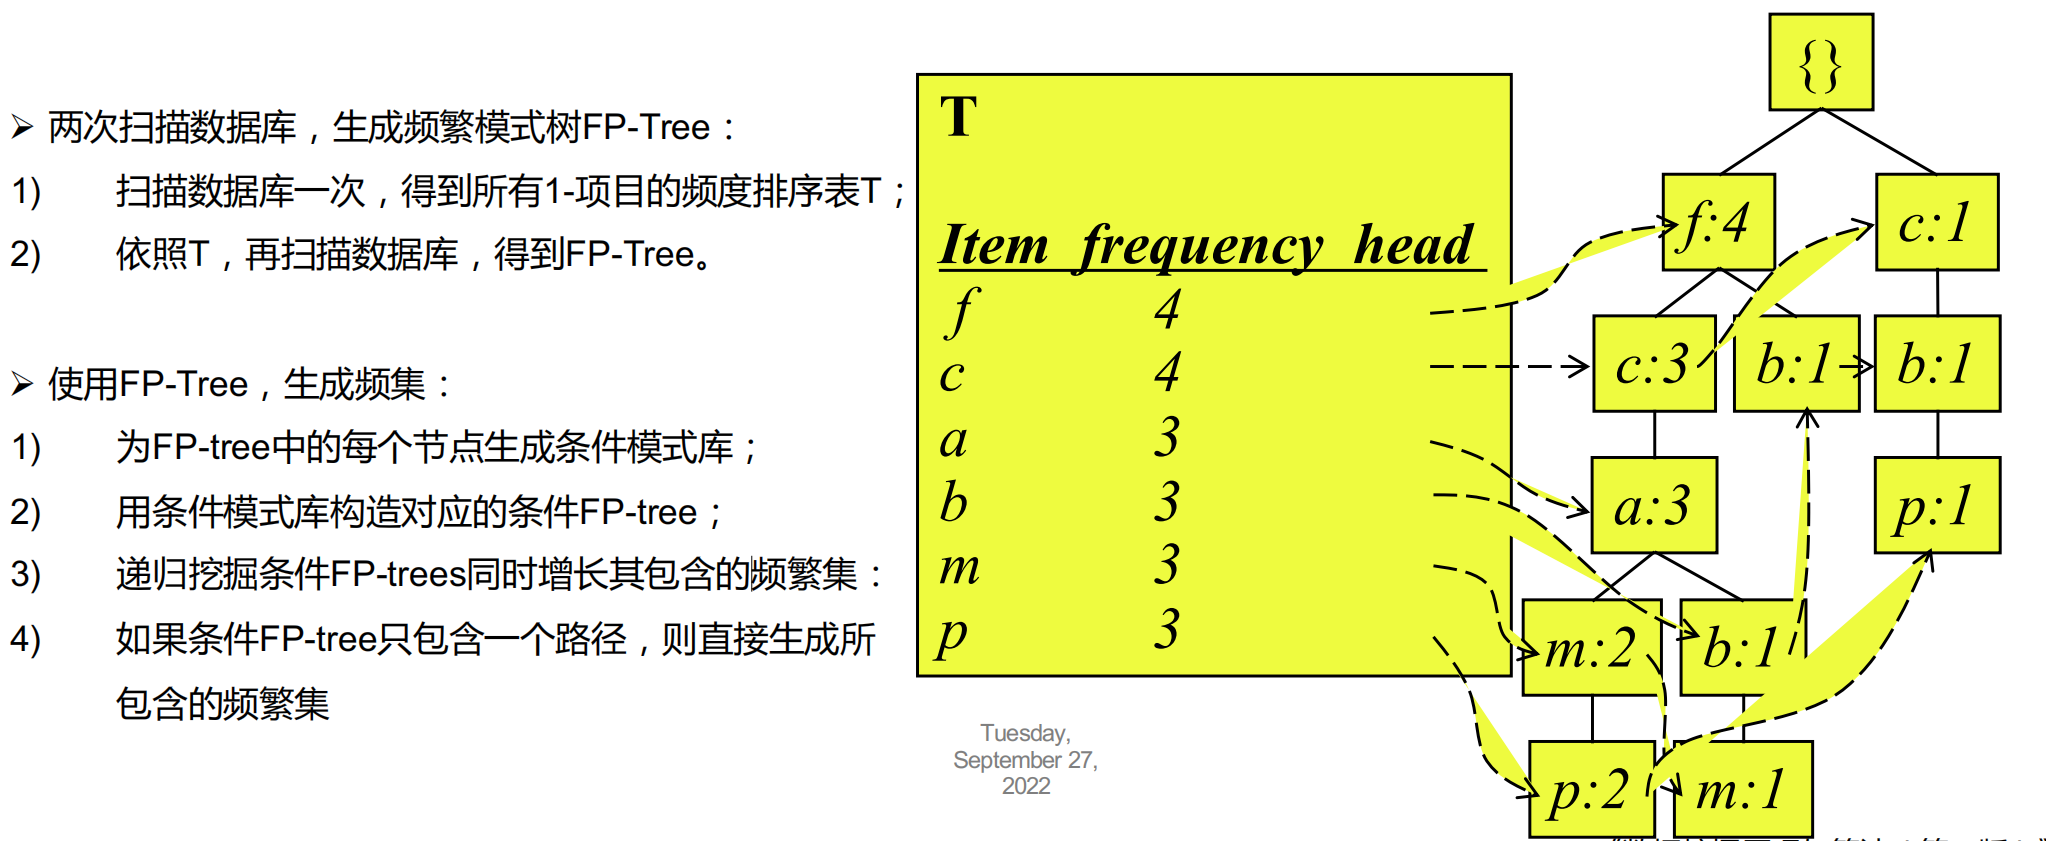

为每个节点， 寻找它的所有前缀路径并记录其频度，形成CPB

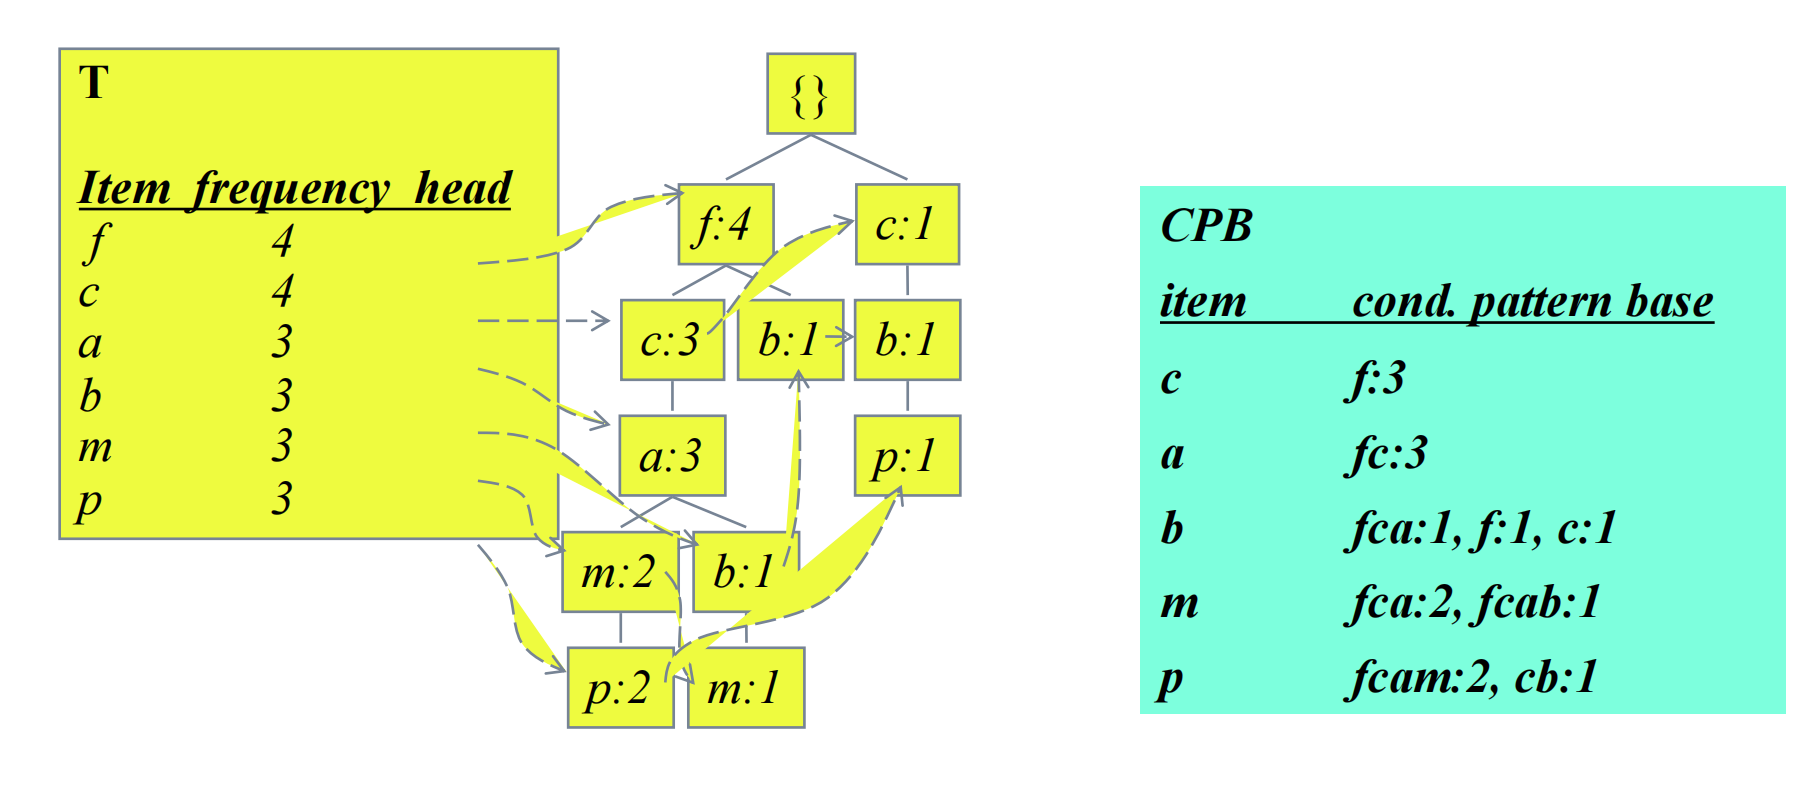

为每一个节点，通过FP-tree构造一个C-FP-tree 例如，m节点的C-FP-tree为：

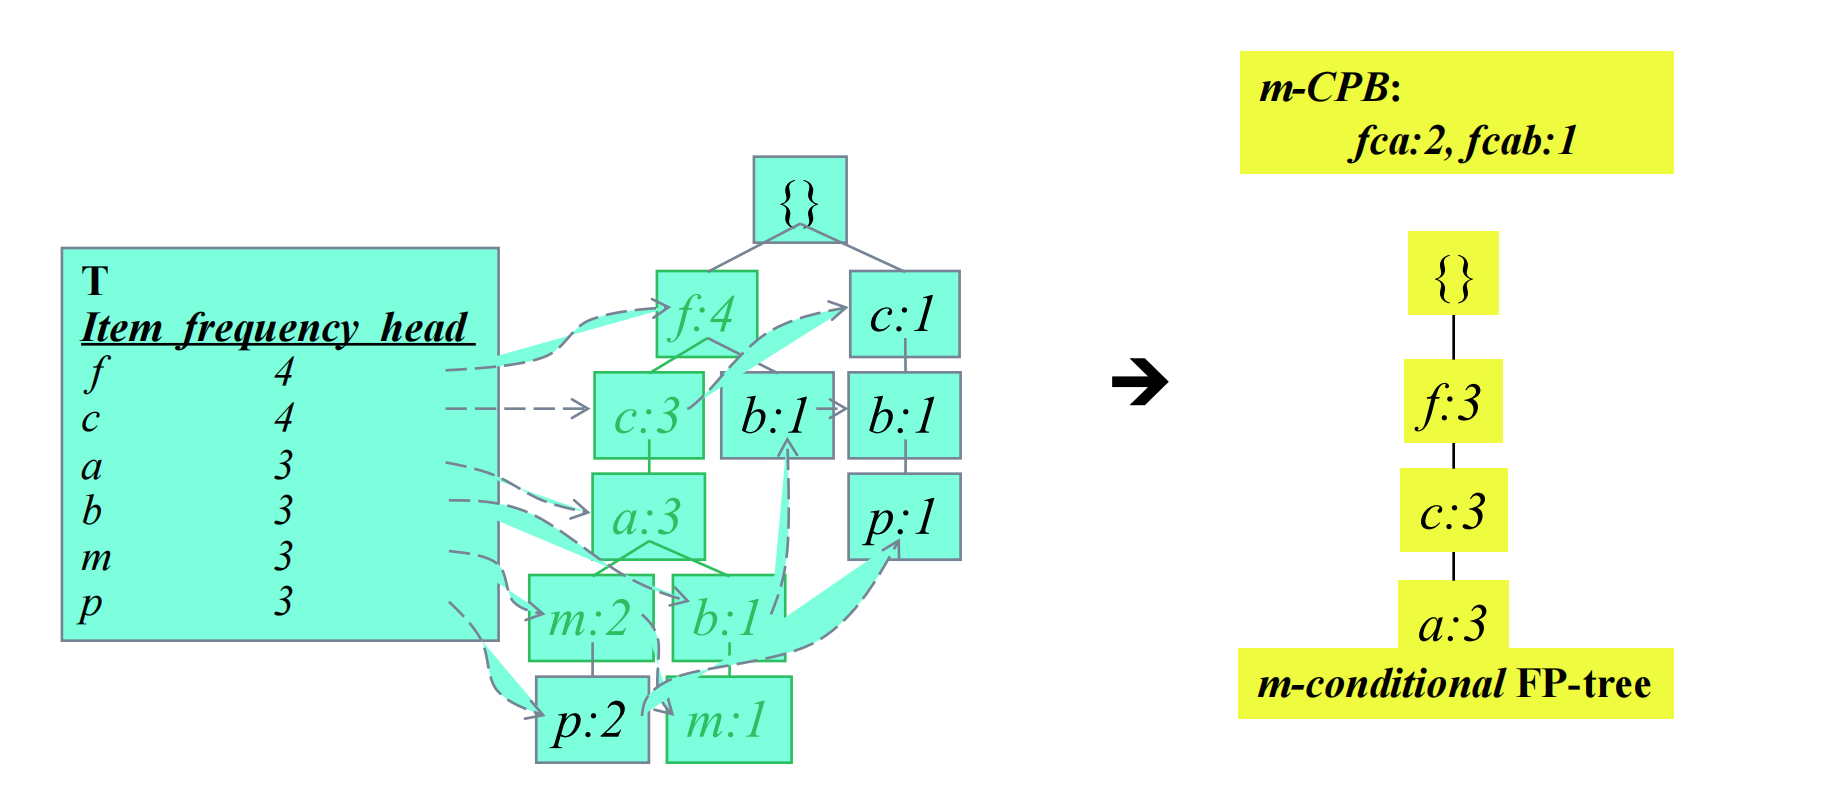

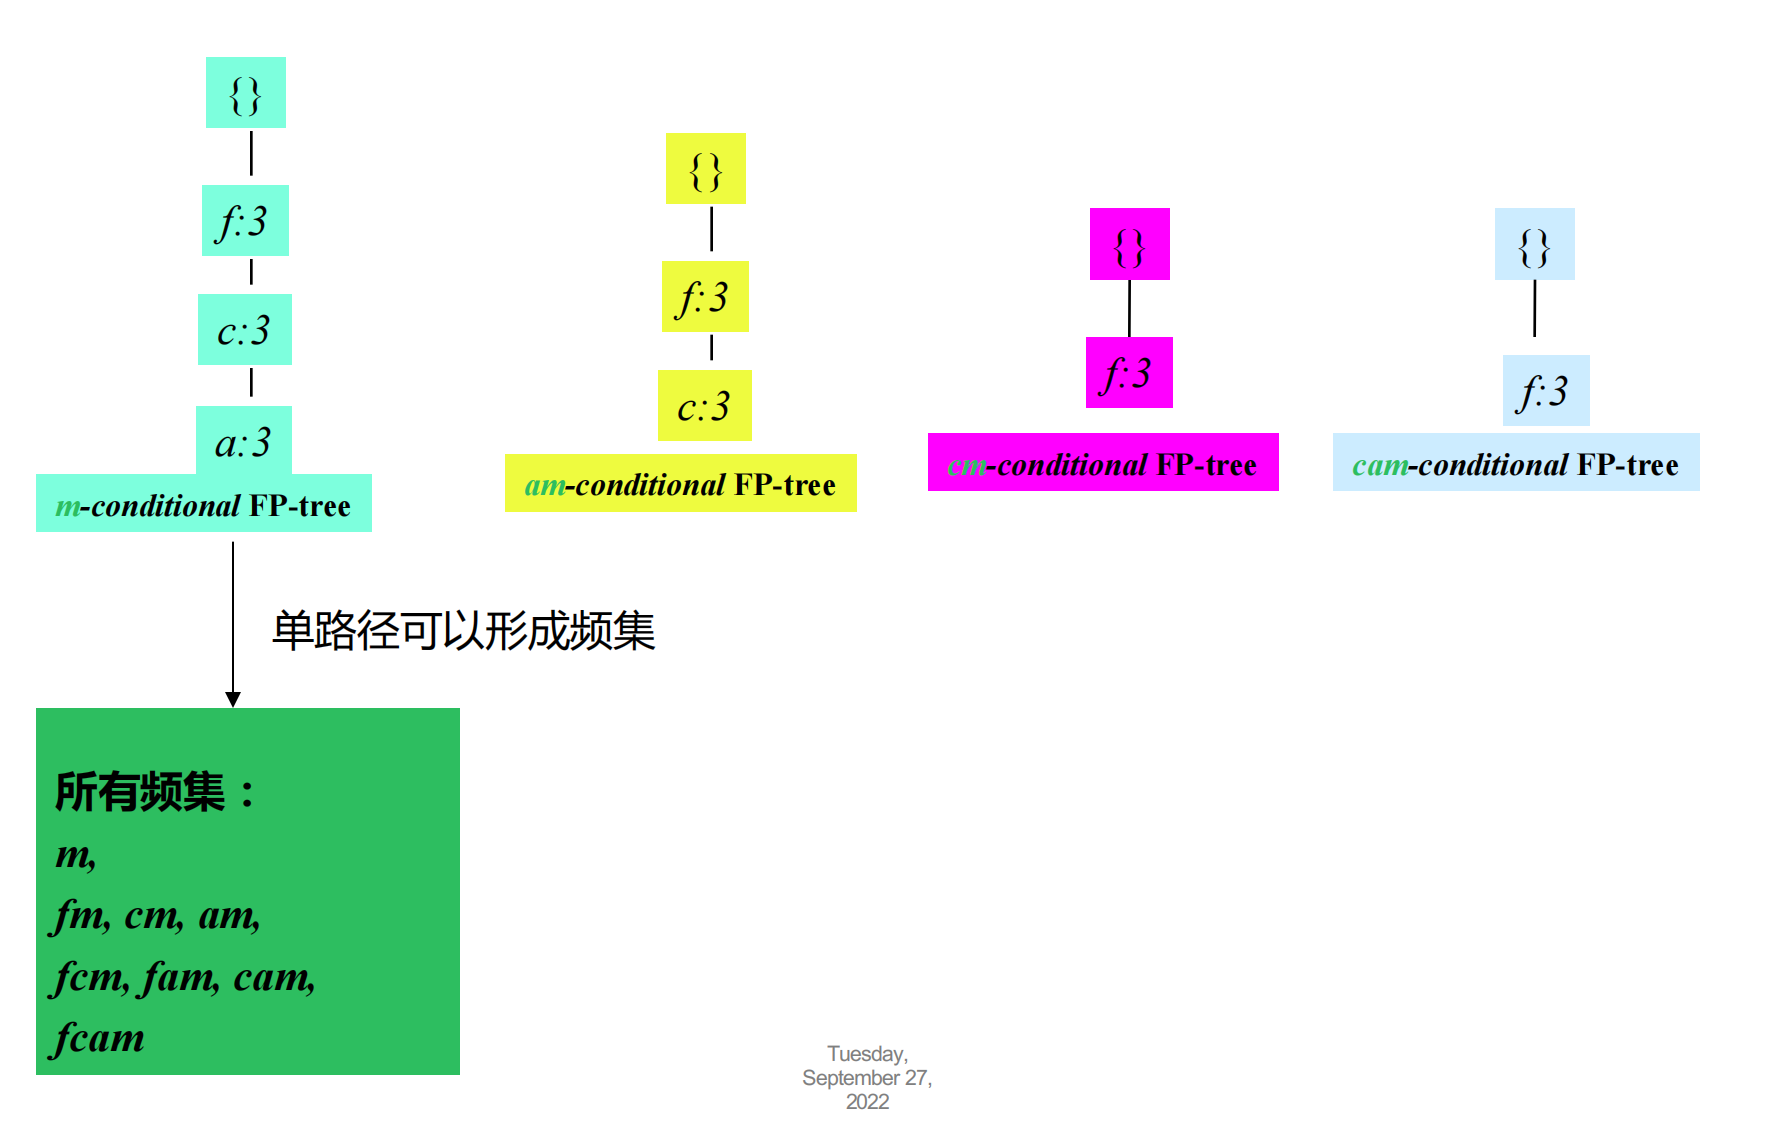

下面是一个使用mlxtend库实现FP-growth算法的简单示例代码：

In [8]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
import pandas as pd
# 创建数据集
dataset = [['apple', 'beer', 'rice', 'chicken'],
           ['apple', 'beer', 'rice'],
           ['apple', 'beer'],
           ['apple', 'banana'],
           ['milk', 'beer', 'rice', 'chicken'],
           ['milk', 'beer', 'rice'],
           ['milk', 'beer'],
           ['milk', 'banana']]

# 将数据集转换为布尔值编码格式
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# 使用fpgrowth函数寻找频繁项集
frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)

print(frequent_itemsets)

   support      itemsets
0     0.75        (beer)
1     0.50        (rice)
2     0.50       (apple)
3     0.50        (milk)
4     0.50  (rice, beer)


这个示例使用了mlxtend库中的TransactionEncoder将原始数据集转换为布尔值编码格式，并使用fpgrowth函数寻找频繁项集。在这个例子中，我们设置了最小支持度为0.5，即只保留出现频率大于等于50%的项集。注意，mlxtend库还提供了其他关联规则算法的实现，比如Apriori算法和Eclat算法。使用这些算法的步骤类似，只需要调用相应的函数即可。

结合Apriori和FP-tree这两种经典的关联规则算法，衡量关联规则挖掘结果的有效性，应该从多种综合角度来考虑：

（1）准确性：挖掘出的规则必须反映数据的实际情况。

（2）实用性：挖掘出的规则必须是简洁可用的。

（3）新颖性：挖掘出的关联规则可以为用户提供新的有价值信息。

（4）一个规则的有用与否最终取决于用户主观的感觉。

（5）使用“支持度-可信度” 的关联规则挖掘度量框架，在客观上也可能出现与事实不相符的结果。例如，“计算机游戏和录象产品是负相关的”问题